# Pandas 자료구조

In [1]:
from IPython.display import Image
import numpy as np

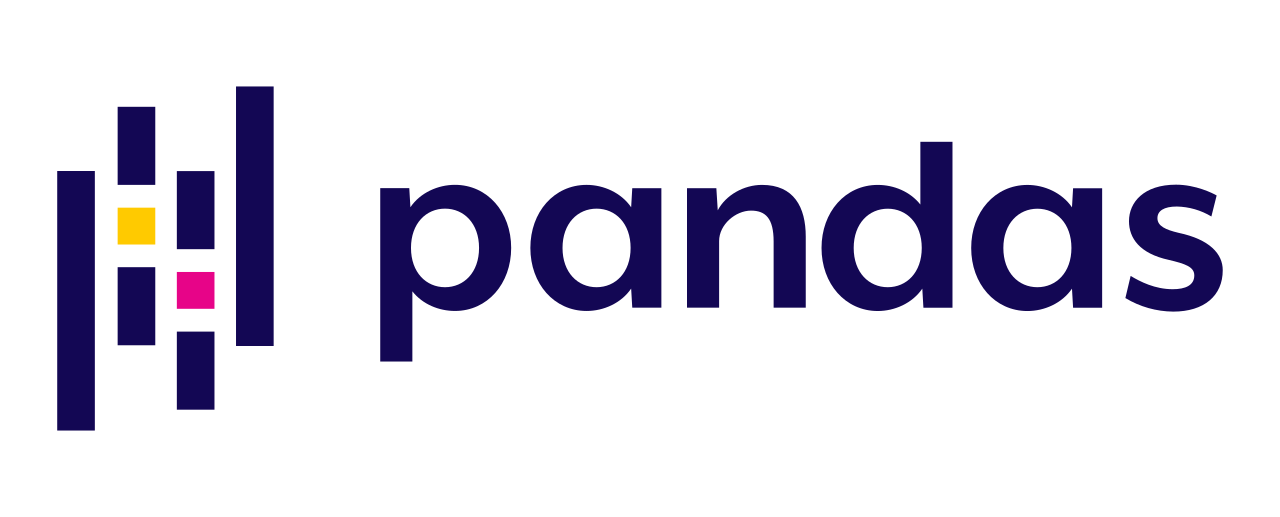

In [2]:
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1280px-Pandas_logo.svg.png', width=500)

## Pandas

### 개요

**관계형** 또는 **레이블이 된** 데이터로 쉽고 직관적 으로 작업할 수 있도록 설계되었고, 빠르고, 유연한 데이터 구조를 제공하는 Python 패키지입니다.

또한, 어떤 언어로도 사용할 수 있는 가장 **강력하고 유연한 오픈 소스 데이터 분석 / 조직 도구**입니다.

Pandas는 다음의 종류의 데이터에 **적합한 분석 패키지**입니다.

- SQL 테이블 또는 Excel 스프레드 시트에서와 같은 열과 행으로 이루어진 테이블 형식 데이터
- 정렬되고 정렬되지 않은 시계열 데이터
- 다른 형태의 관찰 / 통계 데이터 세트

### Pandas 공식 문서

공식 문서는 다음 링크에서 확인할 수 있습니다.
- [공식 도큐먼트](https://pandas.pydata.org/docs/reference/index.html)

## alias(별칭)와 버전

In [3]:
import pandas

In [4]:
pandas.__version__

'1.1.5'

pandas는 `pd`의 alias를 사용합니다.

In [5]:
import pandas as pd

In [6]:
pd

<module 'pandas' from '/opt/conda/lib/python3.6/site-packages/pandas/__init__.py'>

In [7]:
pd.__version__

'1.1.5'

## Series

[도큐먼트](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html?highlight=series#pandas.Series)

Pandas의 Series는 1차원 배열로서 다음의 특징을 가집니다.

- 데이터를 담는 **차원 배열 구조**를 가집니다.
- **인덱스(index)를 사용 가능**합니다.
- **데이터 타입**을 가집니다. (dtype)

### Series의 생성

#### **numpy array**로 생성한 경우

In [8]:
arr = np.arange(100, 105)
arr

array([100, 101, 102, 103, 104])

In [9]:
s = pd.Series(arr)
s

0    100
1    101
2    102
3    103
4    104
dtype: int64

#### dtype을 지정한 경우

In [10]:
s = pd.Series(arr, dtype='int32')
s

0    100
1    101
2    102
3    103
4    104
dtype: int32

#### **list**로 생성한 경우

In [11]:
s = pd.Series(['부장', '차장', '대리', '사원', '인턴'])
s

0    부장
1    차장
2    대리
3    사원
4    인턴
dtype: object

#### 다양한 타입(type)의 데이터를 섞은 경우

Series에 다양한 데이터 타입의 데이터로 생성시, **object** 타입으로 생성됩니다.

In [12]:
s = pd.Series([91, 2.5, '스포츠', 4, 5.16])
s

0      91
1     2.5
2     스포츠
3       4
4    5.16
dtype: object

### index

In [13]:
# 샘플데이터
s = pd.Series(['부장', '차장', '대리', '사원', '인턴'])
s

0    부장
1    차장
2    대리
3    사원
4    인턴
dtype: object

기본 `index`는 0부터 숫자형 index가 부여됩니다.

In [14]:
s

0    부장
1    차장
2    대리
3    사원
4    인턴
dtype: object

기본 부여된 `index`로 값을 조회할 수 있습니다. 

(indexing / slicing 은 이후에 좀 더 자세히 다룹니다.)

In [15]:
s[0]

'부장'

`.index`를 출력하면 **RangeIndex**로 표기됨을 확인할 수 있는데, 기본 부여된 **index는 0~ 순차적으로 부여**되기 때문입니다.

In [16]:
s.index

RangeIndex(start=0, stop=5, step=1)

내가 원하는 `index`를 **지정**할 수 있습니다.

In [17]:
s = pd.Series(['마케팅', '경영', '개발', '기획', '인사'], index=['a', 'b', 'c', 'd', 'e'])
s

a    마케팅
b     경영
c     개발
d     기획
e     인사
dtype: object

새롭게 부여된 index로 **접근 가능**합니다.

In [18]:
s['c']

'개발'

하지만, 기본 부여된 **숫자형 index로도 접근 가능**합니다.

In [19]:
s[2]

'개발'

Series.`index`로도 index를 지정할 수 있습니다. 단, 지정하는 `index`의 갯수가 데이터의 갯수와 맞아야 합니다.

In [20]:
s.index = list('abcde')

In [21]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

### values

`values`는 Series 데이터 값(value)만 **numpy array** 형식으로 가져 옵니다.

In [22]:
s.values

array(['마케팅', '경영', '개발', '기획', '인사'], dtype=object)

### ndim - 차원

Series는 1차원 자료구조이기 때문에 ndim 출력시 **1**이 출력됩니다.

In [23]:
s.ndim

1

### shape

shape은 데이터의 모양(shape)을 알아보기 위하여 사용하는데, Series의 shape은 **데이터의 갯수**를 나타냅니다.

**튜플(tuple)** 형식으로 출력됩니다.

In [24]:
s.shape

(5,)

### NaN (Not a Number)

Pandas에서 **NaN 값**은 비어있는 **결측치 데이터**를 의미합니다.

임의로 비어있는 값을 대입하고자 할 때는 **numpy의 nan (np.nan)**을 입력합니다.

In [25]:
s = pd.Series(['선화', '강호', np.nan, '소정', '우영'])
s

0     선화
1     강호
2    NaN
3     소정
4     우영
dtype: object

### 연습문제

다음과 같은 Series를 생성해 주세요

- s1 변수에 Series를 생성합니다.
- dtype은 'float32'가 출력 되도록 합니다.

In [26]:
# 코드를 입력해 주세요
s1 = pd.Series(np.arange(50, 55), dtype='float32')
s1

0    50.0
1    51.0
2    52.0
3    53.0
4    54.0
dtype: float32

다음과 같은 Series를 생성해 주세요

- s2 변수에 Series를 생성합니다.

In [27]:
# 코드를 입력해 주세요
s2 = pd.Series(['apple', np.nan, 'banana', 'kiwi', 'gubong'], index=list('가나다라마'))
s2

가     apple
나       NaN
다    banana
라      kiwi
마    gubong
dtype: object

### indexing

In [28]:
s = pd.Series(['손흥민', '김연아', '박세리', '박찬호', '김연경'], index=['a', 'b', 'c', 'd', 'e'])
s

a    손흥민
b    김연아
c    박세리
d    박찬호
e    김연경
dtype: object

index는 기본 부여된 **숫자형 index**와 내가 **새롭게 지정한 index** **둘 다 조회 가능**합니다.

In [29]:
s[1]

'김연아'

In [30]:
s['b']

'김연아'

### fancy indexing

**fancy indexing**은 index를 선택하여 list로 정의하고, 선택한 index list로 indexing 하는 방법입니다.

In [31]:
s[['a','c']]

a    손흥민
c    박세리
dtype: object

In [32]:
i = ['a', 'c']
s[i]

a    손흥민
c    박세리
dtype: object

### boolean indexing

**boolean index**은 index list 에서 **True인 index 만 선택**합니다.

주의해야할 점은 반드시 boolean index list의 갯수와 Series의 갯수가 맞아야 합니다.

In [33]:
s[[True, True, False, False, True]]

a    손흥민
b    김연아
e    김연경
dtype: object

In [34]:
i = [True, True, False, False, True]
s[i]

a    손흥민
b    김연아
e    김연경
dtype: object

조건을 걸어서 **boolean index list를 먼저 만들어 준 뒤 대입**할 수 있습니다.

In [35]:
s = pd.Series([29, 99, np.nan, 11, 56], index=['a', 'b', 'c', 'd', 'e'])
s

a    29.0
b    99.0
c     NaN
d    11.0
e    56.0
dtype: float64

In [36]:
s > 50

a    False
b     True
c    False
d    False
e     True
dtype: bool

In [37]:
s[s > 50]

b    99.0
e    56.0
dtype: float64

### 결측치 (NaN) 값 처리

`isnull()`과 `isna()`은 **NaN** 값을 찾는 함수 입니다.

`isnull()`과 `isna()`는 결과가 동일합니다.

In [38]:
s.isnull()

a    False
b    False
c     True
d    False
e    False
dtype: bool

In [39]:
s.isna()

a    False
b    False
c     True
d    False
e    False
dtype: bool

이를 boolean indexing에 적용해볼 수 있습니다.

In [40]:
s[s.isnull()]

c   NaN
dtype: float64

In [41]:
s[s.isna()]

c   NaN
dtype: float64

`notnull()`은 NaN값이 아닌, 즉 비어있지 않은 데이터를 찾는 함수 입니다.

In [42]:
s.notnull()

a     True
b     True
c    False
d     True
e     True
dtype: bool

In [43]:
s[s.notnull()]

a    29.0
b    99.0
d    11.0
e    56.0
dtype: float64

### slicing

**(주의)** 숫자형 index로 접근할 때는 뒷 index가 포함되지 않습니다.

In [44]:
s[1:3]

b    99.0
c     NaN
dtype: float64

새롭게 지정한 인덱스는 시작 index와 끝 index **모두 포함**합니다.

In [45]:
s['b':'c']

b    99.0
c     NaN
dtype: float64

## DataFrame

[도큐먼트](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

`pd.DataFrame`

- 2차원 데이터 구조 (Excel 데이터 시트를 생각하시면 됩니다)
- 행(row), 열(column)으로 구성되어 있습니다.
- 각 열(column)은 각각의 데이터 타입 (dtype)을 가집니다.

### 생성

**list 를 통한 생성**할 수 있습니다. DataFrame을 만들 때는 **2차원 list를 대입**합니다.

In [46]:
pd.DataFrame([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


아래 예제와 같이 **columns를 지정**하면, DataFrame의 각 열에 대한 컬럼명이 붙습니다.

In [47]:
pd.DataFrame([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]], columns=['가', '나', '다'])

,가,나,다
0,1,2,3
1,4,5,6
2,7,8,9


**dictionary를 통한 생성**도 가능합니다.

편리한 점은 dictionary의 **key 값이 자동으로 column 명으로 지정**됩니다.

In [48]:
data = {
    'name': ['Kim', 'Lee', 'Park'], 
    'age': [24, 27, 34], 
    'children': [2, 1, 3]
}

In [49]:
pd.DataFrame(data)

,name,age,children
0,Kim,24,2
1,Lee,27,1
2,Park,34,3


### 속성

DataFrame은 다음의 **속성**을 가집니다.

- **index**: index (기본 값으로 RangeIndex)
- **columns**: column 명
- **values**: numpy array형식의 데이터 값
- **dtypes**: column 별 데이터 타입
- **T**: DataFrame을 전치(Transpose)

In [50]:
data = {
    'name': ['Kim', 'Lee', 'Park'], 
    'age': [24, 27, 34], 
    'children': [2, 1, 3]
}

df = pd.DataFrame(data)
df

,name,age,children
0,Kim,24,2
1,Lee,27,1
2,Park,34,3


In [51]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [52]:
df.columns

Index(['name', 'age', 'children'], dtype='object')

In [53]:
df.values

array([['Kim', 24, 2],
       ['Lee', 27, 1],
       ['Park', 34, 3]], dtype=object)

In [54]:
df.dtypes

name        object
age          int64
children     int64
dtype: object

In [55]:
df.T

,0,1,2
name,Kim,Lee,Park
age,24,27,34
children,2,1,3


### index 지정

In [56]:
df

,name,age,children
0,Kim,24,2
1,Lee,27,1
2,Park,34,3


In [57]:
df.index = list('abc')
df

,name,age,children
a,Kim,24,2
b,Lee,27,1
c,Park,34,3


(참고) DataFrame의 indexing / slicing은 나중에 세부적으로 다루도록 하겠습니다.

### column 다루기

DataFrame에 key 값으로 column의 이름을 지정하여 column을 선택할 수 있습니다.

1개의 column을 가져올 수 있으며, **1개의 column 선택시 Series**가 됩니다.

In [58]:
df['name']

a     Kim
b     Lee
c    Park
Name: name, dtype: object

In [59]:
type(df['name'])

pandas.core.series.Series

2개 이상의 column 선택은 **fancy indexing으로 가능**합니다.

In [60]:
df[['name', 'children']]

,name,children
a,Kim,2
b,Lee,1
c,Park,3


(참고) column에 대한 slicing도 가능 하지만 이 부분도 나중에 다루도록 하겠습니다.

**rename**으로 column명 변경 가능합니다.

DataFrame.rename(columns={'바꾸고자 하는 컬럼명': '바꿀 컬럼명'})

In [61]:
df.rename(columns={'name': '이름'})

,이름,age,children
a,Kim,24,2
b,Lee,27,1
c,Park,34,3


In [62]:
df.rename({'name': '이름'}, axis=1)

,이름,age,children
a,Kim,24,2
b,Lee,27,1
c,Park,34,3


`inplace=True` 옵션으로 변경사항을 바로 적용할 수 있습니다.

In [63]:
df.rename(columns={'name': '이름'}, inplace=True)
df

,이름,age,children
a,Kim,24,2
b,Lee,27,1
c,Park,34,3


### 연습문제

다음의 DataFrame을 생성하세요

- 생성된 DataFrame은 df 변수에 할당합니다.

In [64]:
# 코드를 입력해 주세요
data = {
    'food': ['KFC', 'McDonald', 'SchoolFood'], 
    'price': [1000, 2000, 2500], 
    'rating': [4.5, 3.9, 4.2]
}

df = pd.DataFrame(data)
df

,food,price,rating
0,KFC,1000,4.5
1,McDonald,2000,3.9
2,SchoolFood,2500,4.2


food 컬럼과 rating 컬럼만 선택하여 출력하세요

In [65]:
# 코드를 입력해 주세요
df[['food', 'rating']]

,food,rating
0,KFC,4.5
1,McDonald,3.9
2,SchoolFood,4.2


food 컬럼명을 place로 컬럼명을 변경해 주세요

In [66]:
# 코드를 입력해 주세요
df.rename(columns={'food': 'place'}, inplace=True)
df

,place,price,rating
0,KFC,1000,4.5
1,McDonald,2000,3.9
2,SchoolFood,2500,4.2


# Pandas 파일 입출력

## 모듈 import

In [67]:
from IPython.display import Image
import numpy as np
import pandas as pd

## 데이터 다운로드

In [68]:
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/seoul_transportation.xlsx
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/seoul_population.csv
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/titanic_train.csv

--2021-10-19 11:35:57--  http://sk.jaen.kr:8080/seoul_transportation.xlsx
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Authentication required."
Reusing existing connection to sk.jaen.kr:8080.
HTTP request sent, awaiting response... 304 Not Modified
File ‘seoul_transportation.xlsx’ not modified on server. Omitting download.

--2021-10-19 11:35:58--  http://sk.jaen.kr:8080/seoul_population.csv
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Authentication required."
Reusing existing connection to sk.jaen.kr:8080.
HTTP request sent, awaiting response... 304 Not Modified
File ‘seoul_population.csv’ not modified on server. Omitting download.

--2021

## Excel

[도큐먼트](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

### Excel - 불러오기

Excel 데이터를 바로 읽어들일 수 있으며, `sheet_name`을 지정하면 해당 sheet를 가져옵니다.

In [69]:
excel = pd.read_excel('seoul_transportation.xlsx', sheet_name='철도', engine='openpyxl')

In [70]:
excel.head()

,대중교통구분,노선명,년월,승차총승객수
0,지하철,1호선,201711,8633618
1,지하철,1호선,201712,8737235
2,지하철,1호선,201801,8145989
3,지하철,1호선,201802,7273309
4,지하철,1호선,201803,8692551


In [71]:
excel = pd.read_excel('seoul_transportation.xlsx', sheet_name='버스', engine='openpyxl')
excel.head()

,대중교통구분,년월,승차총승객수
0,버스,201711,163443126
1,버스,201712,162521011
2,버스,201801,153335185
3,버스,201802,134768582
4,버스,201803,166177855


`sheet_name`을 None으로 지정하면, 모든 sheet를 가지고 옵니다.

가지고 올 때는 OrderedDict로 가져오며, `keys()`로 **시트명을 조회**할 수 있습니다.

In [72]:
excel = pd.read_excel('seoul_transportation.xlsx', sheet_name=None, engine='openpyxl')
excel

{'철도':     대중교통구분    노선명      년월   승차총승객수
 0      지하철    1호선  201711  8633618
 1      지하철    1호선  201712  8737235
 2      지하철    1호선  201801  8145989
 3      지하철    1호선  201802  7273309
 4      지하철    1호선  201803  8692551
 ..     ...    ...     ...      ...
 596    지하철  우이신설선  201901  1263643
 597    지하철  우이신설선  201902  1102109
 598    지하철  우이신설선  201903  1402393
 599    지하철  우이신설선  201904  1403115
 600    지하철  우이신설선  201905  1469681
 
 [601 rows x 4 columns], '버스':    대중교통구분      년월     승차총승객수
 0      버스  201711  163443126
 1      버스  201712  162521011
 2      버스  201801  153335185
 3      버스  201802  134768582
 4      버스  201803  166177855
 5      버스  201804  160452595
 6      버스  201805  164390595
 7      버스  201806  156999747
 8      버스  201807  163736112
 9      버스  201808  160240197
 10     버스  201809  151311657
 11     버스  201810  165820934
 12     버스  201811  163017758
 13     버스  201812  158049446
 14     버스  201901  153037549
 15     버스  201902  131621925
 16     버스  201903  

In [73]:
# 시트 조회
excel.keys()

dict_keys(['철도', '버스'])

In [74]:
excel['철도'].head()

,대중교통구분,노선명,년월,승차총승객수
0,지하철,1호선,201711,8633618
1,지하철,1호선,201712,8737235
2,지하철,1호선,201801,8145989
3,지하철,1호선,201802,7273309
4,지하철,1호선,201803,8692551


In [75]:
excel['버스'].head()

,대중교통구분,년월,승차총승객수
0,버스,201711,163443126
1,버스,201712,162521011
2,버스,201801,153335185
3,버스,201802,134768582
4,버스,201803,166177855


### Excel - 저장하기

DataFrame을 Excel로 저장할 수 있으며, Excel로 저장시 **파일명**을 지정합니다.

- `index=False` 옵션은 가급적 꼭 지정하는 옵션입니다. 지정을 안하면 **index가 별도의 컬럼으로 저장**되게 됩니다.
- `sheet_name`을 지정하여, 저장할 시트의 이름을 변경할 수 있습니다.


In [79]:
excel['버스'].to_excel('sample.xlsx', index=True)

In [80]:
excel['버스'].to_excel('sample1.xlsx', index=False, sheet_name='샘플')

### Excel - 여러개의 시트에 저장

여래 개의 시트에 저장하기 위해서는 **ExcelWriter를 사용**해야 합니다.

In [81]:
writer = pd.ExcelWriter('sample2.xlsx')
excel.to_excel(writer, index=False, sheet_name='샘플1')
excel.to_excel(writer, index=False, sheet_name='샘플2')
excel.to_excel(writer, index=False, sheet_name='샘플3')
writer.close()

AttributeError: 'dict' object has no attribute 'to_excel'

## CSV (Comma Separated Values)

- 한 줄이 한 개의 행에 해당하며, 열 사이에는** 쉼표(,)를 넣어 구분**합니다.
- Excel보다는 훨씬 가볍고 **차지하는 용량이 적기 때문에 대부분의 파일데이터는 csv 형태**로 제공됩니다.

(참고) 쉼표를 찍어 놓은 금액 데이터(100,000)를 CSV에 직접 집어넣으면 나중에 해석할 때 서로 다른 열로 취급되므로 문제가 될 수 있습니다. 해결책으로 쉼표 대신 탭 문자(\t)를 구분자로 사용하는 것이다. 이러한 경우 **Tab Separated Values(TSV)**라고 부른다.

### CSV - 불러오기

In [ ]:
df = pd.read_csv('seoul_population.csv')

In [ ]:
df.head()

때때로 한글데이터를 불러올 때 다른 인코딩을 사용해야하는 경우도 있습니다.그럴 땐 `encoding` 옵션을 지정해주면 됩니다.

In [ ]:
df = pd.read_csv('seoul_population.csv', encoding='utf8')

In [ ]:
df.head()

### CSV - 큰 파일 데이터 끊어서 불러오기

데이터의 크기가 매우 큰 경우 memory에 한 번에 로드할 수 없습니다.

`chunksize`를 지정하고 `chunksize`만큼 끊어서 불어와서 처리하게 되면 용량이 매우 큰 데이터도 처리할 수 있습니다.

예시) `chunksize=10`: 5개의 데이터를 로드합니다.

In [82]:
df = pd.read_csv('seoul_population.csv', chunksize=10)

In [83]:
for d in df:
    display(d)

,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,합계,"4,202,888","10,197,604","5,000,005","5,197,599","9,926,968","4,871,560","5,055,408","270,636","128,445","142,191",2.36,"1,321,458"
1,종로구,"72,654","162,820","79,675","83,145","153,589","75,611","77,978","9,231","4,064","5,167",2.11,"25,425"
2,중구,"59,481","133,240","65,790","67,450","124,312","61,656","62,656","8,928","4,134","4,794",2.09,"20,764"
3,용산구,"106,544","244,203","119,132","125,071","229,456","111,167","118,289","14,747","7,965","6,782",2.15,"36,231"
4,성동구,"130,868","311,244","153,768","157,476","303,380","150,076","153,304","7,864","3,692","4,172",2.32,"39,997"
5,광진구,"158,960",372164,180992,191172,357211,174599,182612,14953,6393,8560,2.25,42214
6,동대문구,159839,369496,182932,186564,354079,177021,177058,15417,5911,9506,2.22,54173
7,중랑구,177548,414503,206102,208401,409882,204265,205617,4621,1837,2784,2.31,56774
8,성북구,188512,461260,224076,237184,449773,219545,230228,11487,4531,6956,2.39,64692
9,강북구,141554,330192,161686,168506,326686,160353,166333,3506,1333,2173,2.31,54813


,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
10,도봉구,136613,348646,171026,177620,346629,170289,176340,2017,737,1280,2.54,51312
11,노원구,219957,569384,276823,292561,565565,275211,290354,3819,1612,2207,2.57,71941
12,은평구,201869,494388,240220,254168,489943,238337,251606,4445,1883,2562,2.43,72334
13,서대문구,137207,327163,156765,170398,314982,152613,162369,12181,4152,8029,2.30,48161
14,마포구,169404,389649,185889,203760,378566,181346,197220,11083,4543,6540,2.23,48765
15,양천구,176921,479978,237117,242861,475949,235278,240671,4029,1839,2190,2.69,52975
16,강서구,247696,603772,294433,309339,597248,291249,305999,6524,3184,3340,2.41,72548
17,구로구,172272,447874,224436,223438,416487,207114,209373,31387,17322,14065,2.42,56833
18,금천구,105146,255082,130558,124524,236353,120334,116019,18729,10224,8505,2.25,32970
19,영등포구,165462,402985,202573,200412,368072,183705,184367,34913,18868,16045,2.22,52413


,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
20,동작구,173033,412520,201217,211303,400456,195775,204681,12064,5442,6622,2.31,56013
21,관악구,253826,525515,264763,260752,507203,256090,251113,18312,8673,9639,2.00,68082
22,서초구,173856,450310,216264,234046,445994,214036,231958,4316,2228,2088,2.57,51733
23,강남구,234107,570500,273301,297199,565550,270726,294824,4950,2575,2375,2.42,63167
24,송파구,259883,667483,325040,342443,660584,321676,338908,6899,3364,3535,2.54,72506
25,강동구,179676,453233,225427,227806,449019,223488,225531,4214,1939,2275,2.50,54622


### CSV - 저장하기

저장하는 방법은 excel과 유사합니다. 다만, csv파일 형식에는 `sheet_name` 옵션은 없습니다.

In [84]:
df = pd.read_csv('seoul_population.csv')

In [85]:
df.to_csv('sample.csv', index=False)

읽어들인 **Excel 파일도 Csv로 저장**할 수 있습니다.

In [86]:
excel = pd.read_excel('seoul_transportation.xlsx', sheet_name='버스')
excel.head()

XLRDError: Excel xlsx file; not supported

# Pandas 조건 정렬 조건 필터

## 모듈 import

In [ ]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

## 실습에 활용할 데이터셋

### 타이타닉: 탑승객의 사망자와 생존자 데이터 분석

In [ ]:
Image('https://www.gukjenews.com/news/photo/201912/1212183_991659_1921.jpg')

In [ ]:
Image('https://1.bp.blogspot.com/-vTBB13E6mtA/WzmniMnyWnI/AAAAAAACzLs/4EL_VcYCGZoO1z2QLLAIqlnO4GlYbZdZACLcBGAs/s1600/1_32.jpg')

In [ ]:
Image('https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg')

건조 당시 세계 최대의 여객선이었지만,**1912년의 최초이자 최후의 항해 때 빙산과 충돌해 침몰한 비운의 여객선**. 아마도 세상에서 가장 유명한 여객선이자 침몰선일 것입니다. 

침몰한 지 100년이 넘었지만 아직까지 세계에서 가장 유명한 침몰선입니다. 

사망자 수는 1위는 아니지만, 세계적으로 유명한 영화의 영향도 있고, 당시 최첨단 기술에 대해 기대감이 컸던 사회에 큰 영향을 끼치기도 한데다가, 근대 사회에서 들어서자마자 얼마 안된, 그리고 **유명인사들이 여럿 희생된 대참사**이기 때문에 가장 유명한 침몰선이 되었습니다. 또한 이 사건을 기점으로 여러가지 안전 조약들이 생겨났으니 더더욱 그렇습니다.

In [ ]:
df = sns.load_dataset("titanic")
df.head()

### 컬럼 (column) 설명 

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

### 데이터 분석!

**주요 목표**
- Pandas를 활용하여 타이타닉호 생존자, 사망자 **데이터를 분석**합니다.
- 데이터를 토대로 생존율이 높은 승객, 생존율이 낮은 승객은 누구인지 판단합니다.

## head() 앞 부분 / tail() 뒷 부분 조회

- default 옵션 값으로 5개의 행이 조회됩니다.
- 괄호 안에 숫자를 넣어 명시적으로 조회하고 싶은 행의 갯수를 지정할 수 있습니다.

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.head(10)

In [ ]:
df.tail(10)

## info()

- 컬럼별 정보(information)를 보여줍니다.
- 데이터의 갯수, 그리고 데이터 타입(dtype)을 확인할 때 사용합니다.

In [ ]:
df.info()

**object** 타입은 쉽게 문자열이라고 생각하면 됩니다.

그런데, **category** 타입도 있습니다. category 타입은 문자열이지만, '남자' / '여자'처럼 카테고리화 할 수 있는 컬럼을 의미 합니다. 나중에 별도로 다루겠습니다.

## describe()

- 각 컬럼에 대한 요약 통계 제공
- 수치형 컬럼 (numerical column)의 통계를 기본으로 보여 줍니다.

In [ ]:
df.describe()

categorical column (문자열 컬럼)에 적용해 볼 수 없지 않습니다.

아래와 같이 `include='object'`를 통해 categorical column에 대한 요약 통계를 확인할 수 있습니다.

In [ ]:
df.describe(include='object')

## value_counts()

column 별 **값의 분포를 확인**할 때 사용합니다.

**남자, 여자, 아이의 데이터 분포를 확인**하고 싶다면 다음과 같이 실행합니다.

In [ ]:
df['who'].value_counts()

### 연습문제

`embark_town`은 승객의 탑승 항구를 나타내는 column 입니다. 탑승 항구별 승객 데이터 분포를 확인해 주세요.

In [ ]:
# 코드를 입력해 주세요
df['embark_town'].value_counts()

## 속성: Attributes

속성 값은 **함수형으로 조회하지 않습니다.**

자주 활용하는 DataFrame은 **속성 값**들은 다음과 같습니다.

- ndim
- shape
- index
- columns
- values
- T

**차원**을 나타냅니다. DataFrame은 2가 출력됩니다.

In [ ]:
df.ndim

**(행, 열)** 순서로 출력됩니다.

In [ ]:
df.shape

index는 기본 설정된 **RangeIndex가 출력**됩니다.

In [ ]:
df.index

columns는 **열**을 출력 합니다. 

In [ ]:
df.columns

values는 모든 값을 출력하며, **numpy array 형식으로 출력**됩니다.

In [ ]:
df.values

T: **전치 (Transpose)** 는 Index와 Column의 축을 교환합니다.

In [ ]:
df.T

## 타입 변환 (astype)

In [ ]:
df.info()

`int32`로 변경

In [ ]:
df['pclass'].astype('int32').head()

`float32`로 변경

In [ ]:
df['pclass'].astype('float32').head()

`object`로 변경

In [ ]:
df['pclass'].astype('str').head()

`category`로 변경.

`category`로 변경시에는 Categories가 같이 출력 됩니다.

In [ ]:
df['pclass'].astype('category').head()

## 정렬 (sort)

### sort_index: index 정렬

- index 기준으로 정렬합니다. (기본 오름차순이 적용되어 있습니다.
- 내림차순 정렬을 적용하려면, `ascending=False`를 옵션 값으로 설정합니다.

In [ ]:
df.sort_index().head(5)

In [ ]:
df.sort_index(ascending=False).head(5)

### sort_values: 값에 대한 정렬

- 값을 기준으로 행을 정렬합니다.
- by에 기준이 되는 행을 설정합니다.
- by에 2개 이상의 컬럼을 지정하여 정렬할 수 있습니다.
- 오름차순/내림차순을 컬럼 별로 지정할 수 있습니다.

In [ ]:
df.sort_values(by='age').head()

내림차순 정렬: `ascending=False`

In [ ]:
df.sort_values(by='age', ascending=False).head()

**문자열 컬럼도 오름차순/내림차순 정렬이 가능**하며 알파벳 순서로 정렬됩니다.

In [ ]:
df.sort_values(by='class', ascending=False).head()

**2개 이상의 컬럼**을 기준으로 값 정렬 할 수 있습니다.

In [ ]:
df.sort_values(by=['fare', 'age']).head()

오름차순/내림차순 정렬도 컬럼 **각각에 지정**해 줄 수 있습니다.

In [ ]:
df.sort_values(by=['fare', 'age'], ascending=[False, True]).head()

## Indexing, Slicing, 조건 필터링

In [ ]:
df.head()

### loc - indexing / slicing

- indexing과 slicing을 할 수 있습니다.
- slicing은 [**시작(포함)**: **끝(포함)**] 규칙에 유의합니다. 둘 다 포함 합니다.

**indexing 예시**

In [ ]:
df.loc[5, 'class']

**fancy indexing 예시**

In [ ]:
df.loc[2:5, ['age', 'fare', 'who']]

**slicing 예시**

In [ ]:
df.loc[2:5, 'class':'deck'].head()

In [ ]:
df.loc[:6, 'class':'deck']

### loc - 조건 필터

boolean index을 만들어 조건에 맞는 데이터만 추출해 낼 수 있습니다.

In [ ]:
condition = df['who'] == 'man'
condition

다음 **2가지의 케이스**로 조건에 맞는 데이터만 추출 할 수 있습니다.

결과는 같습니다.

#### 케이스 1: df[condition]

In [ ]:
df[condition].head()

#### 케이스 2: df.loc[condition]

In [ ]:
df.loc[condition].head()

다만, **loc를 사용하는 것을 추천**합니다. (값 대입시 issue 발생)

In [ ]:
df[condition]['age']

In [ ]:
df[condition]['age'] = 2

다음과 같은 **경고 창**이 뜹니다.

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: <br>
A value is trying to be set on a copy of a slice from a DataFrame.<br>
**Try using .loc[row_indexer,col_indexer] = value instead**<br>
<br>
See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy<br>
  """Entry point for launching an IPython kernel.<br>

값을 대입하여 변경했음에도 불구하고 **값이 변경 되지 않습니다.**

In [ ]:
df[condition]['age']

`loc`를 사용하면 이러한 문제가 발생하지 않아 **실수를 줄일** 수 있습니다.

In [ ]:
df.loc[condition, 'age'] = 10

In [ ]:
df[condition].head()

### loc - 다중 조건

다중 조건은 먼저 condition을 정의하고 **&** 와 **|** 연산자로 **복합 조건을 생성**합니다.

In [ ]:
# 조건1 정의
condition1 = (df['fare'] > 30)

# 조건2 정의
condition2 = (df['who'] == 'woman')

In [ ]:
df.loc[condition1 & condition2]

In [ ]:
df.loc[condition1 | condition2]

### 연습문제

데이터를 다시 로드 합니다.

In [ ]:
df = sns.load_dataset("titanic")
df.head()

1) 다음 조건을 만족하는 코드를 입력하세요.

- 나이가 30살 이상 남자 승객 조건 필터링
- `fare`를 많이 낸 순서로 내림차순 정렬
- 상위 10개를 출력

In [ ]:
# 코드를 입력해 주세요
condition1 = (df['age'] >= 30)
condition2 = (df['who'] == 'man')
df.loc[condition1 & condition2].sort_values(by='fare', ascending=False).head(10)

2) 다음 조건을 만족하는 코드를 입력하세요.

- 나이가 20살 이상 40살 미만인 승객
- `pclass`가 1등급 혹은 2등급인 승객
- 열(column)은 `survived`, `pclass`, `age`, `fare` 만 나오게 출력
- 10개만 출력

In [ ]:
# 코드를 입력해 주세요
condition1 = (df['age'] >= 20) & (df['age'] < 40)
condition2 = (df['pclass'] < 3)
df.loc[condition1 & condition2, ['survived', 'pclass', 'age', 'fare']].head(10)

## iloc

- `loc`와 유사하지만, index만 허용합니다.
- loc와 마찬가지고, indexing / slicing 모두 가능합니다.

In [ ]:
df.head()

**indexing**

In [ ]:
df.iloc[1, 3]

**fancy indexing**

In [ ]:
df.iloc[[0, 3, 4], [0, 1, 5, 6]]

**slicing**

In [ ]:
df.iloc[:3, :5]

## at

하나의 인덱스만 가져옵니다. `loc`보다 속도가 빠르다는 장점은 있지만, 실질적인 효용성은 떨어집니다. 그냥 `loc`를 사용해도 똑같은 결과를 얻을 수 있습니다.

In [ ]:
%timeit df.loc[0, 'fare']

In [ ]:
%timeit df.at[0, 'fare']

## iat

하나의 인덱스만 가져옵니다. 속도가 빠르다는 장점은 있지만, 1개의 데이터만 조회 가능합니다. `iloc`로 대체 사용가능합니다.

In [ ]:
%timeit df.iloc[0, 5]

In [ ]:
%timeit df.iat[0, 5]

## where

[도큐먼트](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html)

`DataFrame.where(cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False)`

Pandas의 `where`는 Numpy의 `where`와 동작이 다릅니다.

- cond: True/False로 판단될 수 있는 식
- other: condition을 만족하지 못하는 요소에 할당 할 값

In [ ]:
df.tail(5)

**컬럼**에 적용할 때

In [ ]:
df['fare'].where(df['fare'] < 20, 0).tail(10)

**행 전체**에 적용할 때 (추천하는 정상적인 방법은 아닙니다)

In [ ]:
df.where(df['fare'] < 20, 0).tail(10)

## isin

특정 값의 포함 여부는 isin 함수를 통해 비교가 가능합니다. (파이썬의 in 키워드는 사용 불가 합니다.)

In [ ]:
sample = pd.DataFrame({'name': ['kim', 'lee', 'park', 'choi'], 
                        'age': [24, 27, 34, 19]
                      })
sample

In [ ]:
sample['name'].isin(['kim', 'lee'])

In [ ]:
sample.isin(['kim', 'lee'])

`loc`를 활용한 **조건 필터링**으로도 찰떡궁합입니다.

In [ ]:
condition = sample['name'].isin(['kim', 'lee'])

In [ ]:
sample.loc[condition]

# Pandas 통계

## 모듈 import

In [87]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

## 데이터셋 로드

In [88]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

# 통계

**통계**는 데이터 분석에서 굉장히 **중요한 요소**입니다.

데이터에 대한 통계 계산식을 Pandas 함수로 제공하기 때문에 어렵지 않게 통계 값을 산출할 수 있습니다.

## describe() - 요약통계

전반적인 주요 통계를 확인할 수 있습니다.

기본 값으로 **수치형(Numerical) 컬럼**에 대한 통계표를 보여줍니다.

- **count**: 데이터 개수
- **mean**: 평균
- **std**: 표준편차
- **min**: 최솟값
- **max**: 최대값

In [89]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**문자열 컬럼에 대한 통계표**도 확인할 수 있습니다.

- **count**: 데이터 개수
- **unique**: 고유 데이터의 값 개수
- **top**: 가장 많이 출현한 데이터 개수
- **freq**: 가장 많이 출현한 데이터의 빈도수

In [90]:
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


## count() - 개수

데이터의 개수

In [91]:
# DataFrame 전체의 개수를 구하는 경우
df.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [92]:
# 단일 column의 데이터 개수를 구하는 경우
df['age'].count()

714

## mean() - 평균

데이터의 **평균**

In [93]:
# DataFrame 평균
df.mean()

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [94]:
# Column 평균
df['age'].mean()

29.69911764705882

### Mean - 조건별 평균

성인 남성의 나이의 평균 구하기

In [95]:
condition = (df['adult_male'] == True)
df.loc[condition, 'age'].mean()

33.17312348668281

### 연습문제

다음 조건을 만족하는 승객의 **나이 평균**과 조건을 만족하는 **데이터의 개수**를 구하세요.

- `fare`를 30 이상 40 미만 지불한 승객
- `pclass`는 1등급

In [96]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [97]:
# 코드를 입력해 주세요 (데이터 개수 구하기)
condition1 = (df['fare'] >= 30) & (df['fare'] < 40)
condition2 = (df['pclass'] == 1)

df.loc[condition1 & condition2, 'age'].count()

21

In [98]:
# 코드를 입력해 주세요 (나이 평균 구하기)
df.loc[condition1 & condition2, 'age'].mean()

44.095238095238095

### `skipna=True` 옵션

기술 통계 함수에서는 `skipna=True`가 **기본으로 설정** 되어 있습니다.

만약, `skipna=False`로 설정하게 된다면, **NaN 값이 있는 column은 NaN 값으로 출력** 됩니다.

In [99]:
# skipna=False를 지정한 경우
df.mean(skipna=False)

survived       0.383838
pclass         2.308642
age                 NaN
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [100]:
# skipna=True를 지정한 경우
df.mean(skipna=True)

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

## median() - 중앙값

데이터의 중앙 값을 출력 합니다. 데이터를 **오름차순 정렬하여 중앙에 위치한 값**입니다.

이상치(outlier)가 존재하는 경우, `mean()`보다 `median()`을 대표값으로 더 **선호**합니다.

In [101]:
pd.Series([1, 2, 3, 4, 5]).median()

3.0

In [102]:
pd.Series([4, 5, 1, 2, 3]).median()

3.0

**짝수**개의 데이터가 있는 경우에는 **가운데 2개 중앙 데이터의 평균 값을 출력** 합니다.

In [103]:
pd.Series([1, 2, 3, 4, 5, 6]).median()

3.5

나이의 평균(mean)과 중앙값(median)은 약간의 **차이가 있음**을 확인할 수 있습니다.

In [104]:
print(f"나이 평균: {df['age'].mean():.5f}\n나이 중앙값: {df['age'].median()}\n차이: {df['age'].mean() - df['age'].median():.5f}")

나이 평균: 29.69912
나이 중앙값: 28.0
차이: 1.69912


## sum() - 합계

데이터의 **합계**입니다. 문자열 column은 모든 데이터가 붙어서 출력될 수 있습니다.

In [105]:
df.sum()

survived                                                    342
pclass                                                     2057
sex           malefemalefemalefemalemalemalemalemalefemalefe...
age                                                     21205.2
sibsp                                                       466
parch                                                       340
fare                                                    28693.9
who           manwomanwomanwomanmanmanmanchildwomanchildchil...
adult_male                                                  537
alive         noyesyesyesnonononoyesyesyesyesnononoyesnoyesn...
alone                                                       537
dtype: object

단일 column에 대한 **합계 출력**

In [106]:
df['fare'].sum()

28693.9493

## cumsum() - 누적합, cumprod() - 누적곱

누적되는 합계를 구할 수 있습니다.

In [107]:
df['age'].cumsum()

0         22.00
1         60.00
2         86.00
3        121.00
4        156.00
         ...   
886    21128.17
887    21147.17
888         NaN
889    21173.17
890    21205.17
Name: age, Length: 891, dtype: float64

누적되는 곱도 구할 수 있으나, 일반적으로 **값이 너무 커지므로 잘 활용하지는 않습니다.**

In [108]:
df['age'].cumprod()

0            22.0
1           836.0
2         21736.0
3        760760.0
4      26626600.0
          ...    
886           inf
887           inf
888           NaN
889           inf
890           inf
Name: age, Length: 891, dtype: float64

## var() - 분산

$\large 분산 = \Huge\frac{{}\sum_{i=1}^{n}(X_{i} - \bar{X})^{2}}{n}$

$\large 평균 = \huge \bar{x}$

In [109]:
# 평균
fare_mean = df['fare'].values.mean()

# 분산
my_var = ((df['fare'].values - fare_mean) ** 2).sum() / (df['fare'].count() - 1)
my_var

2469.436845743116

In [110]:
df['fare'].var()

2469.436845743116

## std() - 표준편차

$\large 표준편차 =\huge \sqrt{분산} = \sqrt{\frac{{}\sum_{i=1}^{n}(X_{i} - \bar{X})^{2}}{n}}$

분산(var)의 제곱근

In [111]:
np.sqrt(df['fare'].var())

49.6934285971809

In [112]:
np.sqrt(my_var)

49.6934285971809

## min() - 최소값, max() - 최대값

In [113]:
# 최소값
df['age'].min()

0.42

In [114]:
# 최대값
df['age'].max()

80.0

## quantile() - 분위

**Quantile이란 주어진 데이터를 동등한 크기로 분할하는 지점**을 말합니다

10%의 경우 0.1을, 80%의 경우 0.8을 대입하여 값을 구합니다.

In [115]:
# 10% quantile
df['age'].quantile(0.1)

14.0

In [116]:
# 60% quantile
df['age'].quantile(0.8)

41.0

## unique() - 고유값, nunique() - 고유값 개수

고유값과 고유값의 개수를 구하고자 할 때 사용합니다.

**unique()**

In [117]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

**nunique()**: 고유값의 개수를 출력합니다.

In [118]:
df['who'].nunique()

3

## mode() - 최빈값

최빈값은 **가장 많이 출현한 데이터**를 의미합니다.

In [119]:
df['who'].mode()

0    man
dtype: object

카테고리형 데이터에도 적용 가능합니다.

In [120]:
df['deck'].mode()

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

## corr() - 상관관계 

`corr()`로 컬럼(column)별 **상관관계**를 확인할 수 있습니다.

- **-1~1 사이의 범위**를 가집니다.
- **-1에 가까울 수록 반비례** 관계, **1에 가까울수록 정비례** 관계를 의미합니다.

In [121]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


**특정 컬럼에 대한 상관관계**를 확인할 수 있습니다.

In [122]:
df.corr()['survived']

survived      1.000000
pclass       -0.338481
age          -0.077221
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

# Pandas 복제 결측치

## 모듈 import

In [123]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

## 데이터셋 로드

In [124]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

## copy

DataFrame을 **복제**합니다. 복제한 DataFrame을 수정해도 **원본에는 영향을 미치지 않습니다.**

In [125]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


`copy()`로 DataFrame을 복제합니다.

In [126]:
df_copy = df.copy()

id 값을 확인하면 두 DataFrame의 **메모리 주소가 다름**을 확인할 수 있습니다.

In [127]:
id(df), id(df_copy)

(140588748649472, 140588175572888)

In [128]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


`df_copy`의 `age`를 99999로 임의 수정하도록 하겠습니다.

In [129]:
df_copy.loc[0, 'age'] = 99999

수정사항이 반영된 것을 확인할 수 있습니다.

In [130]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,99999.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


하지만, 원본 DataFrame의 **데이터는 변경되지 않고 그대로 남아** 있습니다.

In [131]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 결측치

결측치는 **비어있는 데이터**를 의미합니다.

결측치에 대한 처리는 매우 중요합니다. 

결측치에 대한 처리를 해주려면 **다음의 내용**을 반드시 알아야 합니다.

1. 결측 데이터 확인
2. 결측치가 **아닌** 데이터 확인
3. 결측 데이터 **채우기**
4. 결측 데이터 **제거하기**

## 결측치 확인 - isnull(), isnan()

컬럼(column)별 결측치의 갯수를 확인하기 위해서는 `sum()` 함수를 붙혀주면 됩니다.

`sum()`은 Pandas의 통계 관련 함수이며, 통계 관련 함수는 추후에 더 자세히 알아볼 예정입니다.

**isnull()**

In [132]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**isna()**

isnull() 과 동작이 완전 같습니다. 편한 것으로 써주세요. (심지어 도큐먼트도 같습니다)

In [133]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

DataFrame 전체 결측 데이터의 갯수를 합산하기 위해서는 `sum()`을 두 번 사용하면 됩니다.

In [134]:
df.isnull().sum().sum()

869

## 결측치가 아닌 데이터 확인 - notnull()

`notnull()`은 `isnull()`과 정확히 **반대** 개념입니다.

In [135]:
df.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

## 결측 데이터 필터링

`isnull()` 함수가 결측 데이터를 찾는 **boolean index** 입니다.

즉, `loc`에 적용하여 조건 필터링을 걸 수 있습니다.

In [136]:
df.loc[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


## 결측치 채우기 - fillna()

`fillna()`를 활용하면 결측치에 대하여 **일괄적으로 값을 채울 수** 있습니다.

In [137]:
# 원본을 copy하여 df1 변수에 
df1 = df.copy()

In [138]:
df1.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


888번 index의 **결측치가 700으로 채워**진 것을 확인할 수 있습니다.

In [139]:
df1['age'].fillna(700).tail()

886     27.0
887     19.0
888    700.0
889     26.0
890     32.0
Name: age, dtype: float64

In [140]:
df1['age'] = df1['age'].fillna(700)

In [141]:
df1.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,700.0,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


**카테고리 형 데이터**을 채워주기 위해서는 다음과 같은 과정을 거쳐야 합니다.

이미 카테고리가 추가된 'A'나 'B'는 바로 fillna() 할 수 있습니다.

In [142]:
df1['deck'].fillna('A')

0      A
1      C
2      A
3      C
4      A
      ..
886    A
887    B
888    A
889    C
890    A
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

하지만, 없는 카테고리로 채워주고자 할 때는 먼저 `add_categories`로 카테고리를 추가한 후 채워야 합니다.

In [143]:
# add_categories (카테고리 추가)
# cat은 category의 지정자
df1['deck'].cat.add_categories('No Data').fillna('No Data')

0      No Data
1            C
2      No Data
3            C
4      No Data
        ...   
886    No Data
887          B
888    No Data
889          C
890    No Data
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'No Data']

## 통계값으로 채우기

In [144]:
df1 = df.copy()

In [145]:
df1.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### 평균으로 채우기

In [146]:
df1['age'].fillna(df1['age'].mean()).tail()

886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, dtype: float64

### 중앙값으로 채우기

In [147]:
df1['age'].fillna(df1['age'].median()).tail()

886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, dtype: float64

### 최빈값으로 채우기

In [148]:
df1['deck'].mode()

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

**최빈값(mode)**으로 채울 때에는 반드시 **0번째 index 지정**하여 값을 추출한 후 채워야 합니다.

In [149]:
df1['deck'].mode()[0]

'C'

In [150]:
df1['deck'].fillna(df1['deck'].mode()[0]).tail()

886    C
887    B
888    C
889    C
890    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

## NaN 값이 있는 데이터 제거하기 (dropna)

In [151]:
df1 = df.copy()

In [152]:
df1.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


`dropna()`로 **1개 라도 NaN 값이 있는 행**은 제거할 수 있스빈다. (`how='any'`)

In [153]:
df1.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


기본 옵션 값은 `how=any`로 설정되어 있으며, 다음과 같이 변경할 수 있습니다.

- **any**: 1개 라도 NaN값이 존재시 drop
- **all**: 모두 NaN값이 존재시 drop

In [154]:
df1.dropna(how='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Pandas 데이터 전처리, 추가, 삭제, 변환

## 모듈 import

In [155]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

## 데이터셋 로드

In [156]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

## 새로운 컬럼 추가

In [157]:
df1 = df.copy()

In [158]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


임의의 값을 **대입**하여 새로운 컬럼을 추가할 수 있습니다.

In [159]:
df1['VIP'] = True

In [160]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True


## 삭제

삭제는 **행(row) 삭제와 열(column) 삭제**로 구분할 수 있습니다.

### 행 (row) 삭제

행 삭제시 **index를 지정하여 삭제**합니다.

In [161]:
df1.drop(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,True


행 삭제시 **범위를 지정하여 삭제**할 수 있습니다.

In [162]:
df1.drop(df1.index[0:10])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,VIP
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False,True
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,True


**fancy indexing**을 활용하여 삭제할 수 있습니다.

In [163]:
df1.drop(df1.index[[1, 3, 5, 7, 9]])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,True


### 열 (column) 삭제

In [164]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True


열 삭제시 **반드시 `axis=1` 옵션을 지정**해야 합니다. 2번째 위치에 지정시 `axis=`을 생략할 수 있습니다.

In [165]:
df1.drop('class', axis=1).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton,no,True,True


In [166]:
df1.drop('class', 1).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton,no,True,True


**다수의 컬럼(column) 삭제**도 가능합니다.

In [167]:
df1.drop(['who', 'deck', 'alive'], axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,Southampton,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,False,Southampton,True,True
888,0,3,female,NaN,1,2,23.4500,S,Third,False,Southampton,False,True
889,1,1,male,26.0,0,0,30.0000,C,First,True,Cherbourg,True,True


삭제된 내용을 바로 적용하려면 `inplace=True`를 지정합니다.

In [168]:
df1.drop(['who', 'deck', 'alive'], axis=1, inplace=True)

In [169]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone,VIP
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton,True,True


## 컬럼간 연산

**컬럼(column) 과 컬럼 사이의 연산을 매우 쉽게 적용**할 수 있습니다.

In [170]:
df1 = df.copy()

**family(가족)**의 총합은 **sibsp**컬럼과 **parch**의 합산으로 구할 수 있습니다.

In [171]:
df1['family'] = df1['sibsp'] + df1['parch']

In [172]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


**문자열의 합 (이어붙히기)도 가능**합니다.

In [173]:
df1['gender'] = df1['who'] + '-' + df1['sex']

In [174]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family,gender
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,man-male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,woman-female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,woman-female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,woman-female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,man-male


컬럼간 연산시 `round()`를 사용하여 소수점 자릿수를 지정할 수 있습니다.

**round(숫자, 소수 몇 째자리)**

In [175]:
df1['round'] = round(df1['fare'] / df1['age'], 2)

In [176]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family,gender,round
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,man-male,0.33
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,woman-female,1.88
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,woman-female,0.30
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,woman-female,1.52
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,man-male,0.23


연산시 1개의 컬럼이라도 **NaN 값을 포함하고 있다면 결과는 NaN** 이 됩니다.

In [177]:
df1.loc[df1['age'].isnull(), 'deck':].head()

,deck,embark_town,alive,alone,family,gender,round
5,NaN,Queenstown,no,True,0,man-male,NaN
17,NaN,Southampton,yes,True,0,man-male,NaN
19,NaN,Cherbourg,yes,True,0,woman-female,NaN
26,NaN,Cherbourg,no,True,0,man-male,NaN
28,NaN,Queenstown,yes,True,0,woman-female,NaN


## 타입 변환 (astype)

In [178]:
df1 = df.copy()

In [179]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


`int32`로 변경

In [180]:
df1['pclass'].astype('int32').head()

0    3
1    1
2    3
3    1
4    3
Name: pclass, dtype: int32

`float32`로 변경

In [181]:
df1['pclass'].astype('float32').head()

0    3.0
1    1.0
2    3.0
3    1.0
4    3.0
Name: pclass, dtype: float32

`object`로 변경

In [182]:
df1['pclass'].astype('str').head()

0    3
1    1
2    3
3    1
4    3
Name: pclass, dtype: object

`category`로 변경.

`category`로 변경시에는 Categories가 같이 출력 됩니다.

In [183]:
df1['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [184]:
df1['who'].dtype

dtype('O')

In [185]:
df1['who'].astype('category').head()

0      man
1    woman
2    woman
3    woman
4      man
Name: who, dtype: category
Categories (3, object): ['child', 'man', 'woman']

타입을 `category`로 변환했다면 **.cat**으로 접근하여 category 타입이 제공하는 **attribute를 사용**할 수 있습니다.

In [186]:
df1['who'] = df1['who'].astype('category')

In [187]:
df1['who'].dtype

CategoricalDtype(categories=['child', 'man', 'woman'], ordered=False)

In [188]:
df1['who'].cat.codes

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Length: 891, dtype: int8

**카테고리 이름 변경**

In [189]:
["Group (%s)" % g for g in df1['who'].cat.categories]

['Group (child)', 'Group (man)', 'Group (woman)']

In [190]:
df1['who'].cat.categories = ["Group (%s)" % g for g in df1['who'].cat.categories]
df1['who'].value_counts()

Group (man)      537
Group (woman)    271
Group (child)     83
Name: who, dtype: int64

## datetime - 날짜, 시간

### data_range

주요 옵션 값
- **start**: 시작 날짜
- **end**: 끝 날짜
- **periods**: 생성할 데이터 개수
- **freq**: 주기

In [191]:
dates = pd.date_range('20210101', periods=df.shape[0], freq='15H')
dates.shape

(891,)

In [192]:
df1 = df.copy()
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**date의 컬럼**을 만들어 생성한 **date 를 대입**합니다.

In [193]:
df1['date'] = dates
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,date
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2021-01-01 00:00:00
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2021-01-01 15:00:00
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2021-01-02 06:00:00
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2021-01-02 21:00:00
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2021-01-03 12:00:00


In [194]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   survived     891 non-null    int64         
 1   pclass       891 non-null    int64         
 2   sex          891 non-null    object        
 3   age          714 non-null    float64       
 4   sibsp        891 non-null    int64         
 5   parch        891 non-null    int64         
 6   fare         891 non-null    float64       
 7   embarked     889 non-null    object        
 8   class        891 non-null    category      
 9   who          891 non-null    object        
 10  adult_male   891 non-null    bool          
 11  deck         203 non-null    category      
 12  embark_town  889 non-null    object        
 13  alive        891 non-null    object        
 14  alone        891 non-null    bool          
 15  date         891 non-null    datetime64[ns]
dtypes: bool(

**date**의 컬럼에 `datetime64`라는 데이터 타입이 표기됩니다.

### datetime 타입

`datetime` 타입에서는 **dt** 접근자로 다음과 같은 날짜 속성에 쉽게 접근할 수 있습니다.

Pandas의 **dt (datetime) 날짜 관련 변수**는 다음과 같습니다.

[도큐먼트](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.year.html)

- pandas.Series.dt.year: 연도
- pandas.Series.dt.month: 월
- pandas.Series.dt.day: 일
- pandas.Series.dt.hour: 시
- pandas.Series.dt.minute: 분
- pandas.Series.dt.second: 초
- pandas.Series.dt.microsecond: micro 초
- pandas.Series.dt.nanosecond: nano 초
- pandas.Series.dt.week: 주
- pandas.Series.dt.weekofyear: 연중 몇 째주
- pandas.Series.dt.dayofweek: 요일
- pandas.Series.dt.weekday: 요일 (dayofweek과 동일)
- pandas.Series.dt.dayofyear: 연중 몇 번째 날
- pandas.Series.dt.quarter: 분기

In [195]:
# 연도
df1['date'].dt.year.head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: date, dtype: int64

In [196]:
# 월
df1['date'].dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: date, dtype: int64

In [197]:
# 일
df1['date'].dt.day.head()

0    1
1    1
2    2
3    2
4    3
Name: date, dtype: int64

**dayofweek**는 숫자로 요일이 표기 됩니다.
- 월요일: 0, 일요일: 6

In [198]:
df1['date'].dt.dayofweek.head(10)

0    4
1    4
2    5
3    5
4    6
5    0
6    0
7    1
8    2
9    2
Name: date, dtype: int64

### to_datetime

In [199]:
# e notation 표현 방식 변경
pd.options.display.float_format = '{:.2f}'.format

샘플용 **서울시 공공자전거 데이터를 로드**합니다.

In [200]:
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/seoul_bicycle.csv

--2021-10-19 11:38:11--  http://sk.jaen.kr:8080/seoul_bicycle.csv
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Authentication required."
Reusing existing connection to sk.jaen.kr:8080.
HTTP request sent, awaiting response... 200 OK
Length: 31147551 (30M) [text/csv]
Saving to: ‘seoul_bicycle.csv’

seoul_bicycle.csv   100%[===================>]  29.70M  1.33MB/s    in 23s     

2021-10-19 11:38:34 (1.29 MB/s) - ‘seoul_bicycle.csv’ saved [31147551/31147551]



In [201]:
df2 = pd.read_csv('./seoul_bicycle.csv')
df2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,Jan-20-2020,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.00,75
1,Jan-20-2020,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.00,15
2,Jan-20-2020,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.00,53
3,Jan-20-2020,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.00,33
4,Jan-20-2020,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.00,64


In [202]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    327231 non-null  object 
 1   대여소번호   327231 non-null  int64  
 2   대여소명    327231 non-null  object 
 3   대여구분코드  327231 non-null  object 
 4   성별      272841 non-null  object 
 5   연령대코드   327231 non-null  object 
 6   이용건수    327231 non-null  int64  
 7   운동량     327231 non-null  object 
 8   탄소량     327231 non-null  object 
 9   이동거리    327231 non-null  float64
 10  이용시간    327231 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 27.5+ MB


**대여일자** 컬럼은 날짜 관련 컬럼처럼 보이나 `info()`는 object로 인식하였습니다.

`datetime`타입으로 변경해야 .dt 접근자를 사용할 수 있습니다.

**`pd.to_datetime()`**: datetime type으로 변환합니다.

In [203]:
pd.to_datetime(df2['대여일자'])

0        2020-01-20
1        2020-01-20
2        2020-01-20
3        2020-01-20
4        2020-01-20
            ...    
327226   2020-05-20
327227   2020-05-20
327228   2020-05-20
327229   2020-05-20
327230   2020-05-20
Name: 대여일자, Length: 327231, dtype: datetime64[ns]

재대입하여 **컬럼에 적용**합니다.

In [204]:
df2['대여일자'] = pd.to_datetime(df2['대여일자'])

In [205]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   대여일자    327231 non-null  datetime64[ns]
 1   대여소번호   327231 non-null  int64         
 2   대여소명    327231 non-null  object        
 3   대여구분코드  327231 non-null  object        
 4   성별      272841 non-null  object        
 5   연령대코드   327231 non-null  object        
 6   이용건수    327231 non-null  int64         
 7   운동량     327231 non-null  object        
 8   탄소량     327231 non-null  object        
 9   이동거리    327231 non-null  float64       
 10  이용시간    327231 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 27.5+ MB


적용된 후 `.dt`접근자를 활용하여 datetime 속성에 접근할 수 있습니다.

In [206]:
df2['대여일자'].dt.dayofweek

0         0
1         0
2         0
3         0
4         0
         ..
327226    2
327227    2
327228    2
327229    2
327230    2
Name: 대여일자, Length: 327231, dtype: int64

In [207]:
df2['대여일자'].dt.weekday

0         0
1         0
2         0
3         0
4         0
         ..
327226    2
327227    2
327228    2
327229    2
327230    2
Name: 대여일자, Length: 327231, dtype: int64

In [208]:
df2['대여일자'].dt.dayofweek

0         0
1         0
2         0
3         0
4         0
         ..
327226    2
327227    2
327228    2
327229    2
327230    2
Name: 대여일자, Length: 327231, dtype: int64

## pd.to_numeric() - 수치형 변환

object나 numerical type이 아닌 컬럼을 **수치형(numerical) 컬럼으로 변환**할 때 사용합니다.

In [209]:
df2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,2020-01-20,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.00,75
1,2020-01-20,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.00,15
2,2020-01-20,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.00,53
3,2020-01-20,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.00,33
4,2020-01-20,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.00,64


In [210]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   대여일자    327231 non-null  datetime64[ns]
 1   대여소번호   327231 non-null  int64         
 2   대여소명    327231 non-null  object        
 3   대여구분코드  327231 non-null  object        
 4   성별      272841 non-null  object        
 5   연령대코드   327231 non-null  object        
 6   이용건수    327231 non-null  int64         
 7   운동량     327231 non-null  object        
 8   탄소량     327231 non-null  object        
 9   이동거리    327231 non-null  float64       
 10  이용시간    327231 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 27.5+ MB


**운동량** 컬럼은 숫자형 컬럼 처럼 보이지만, **object 타입으로 지정**되어 있습니다. 

종종 이런 현상이 발생하는데, 이런 현상을 만들어낸 이유는 분명 존재합니다!

원인 파악을 위해서 일단 `pd.to_numeric()`으로 **변환을 시도**합니다.

In [211]:
pd.to_numeric(df2['운동량'])

ValueError: Unable to parse string "\N" at position 2344

**2344 position**에 무언가 에러가 발생하였습니다.

In [212]:
df2.loc[2344]

대여일자      2020-01-20 00:00:00
대여소번호                     165
대여소명              165. 중앙근린공원
대여구분코드                 일일(회원)
성별                         \N
연령대코드                 AGE_003
이용건수                        1
운동량                        \N
탄소량                        \N
이동거리                     0.00
이용시간                       40
Name: 2344, dtype: object

운동량에 숫자형이 아닌 개행 (\N)이 들어가 있기 때문에 이러한 에러가 발생하였습니다.

숫자형으로 바꿀 때 **NaN값이나 숫자로 변환이 불가능한 문자열이 존재할 때 변환에 실패**하게 됩니다.

`errors=` 옵션 값을 바꾸어 해결할 수 있습니다.

errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If 'raise', then invalid parsing will raise an exception
    - If 'coerce', then invalid parsing will be set as NaN
    - If 'ignore', then invalid parsing will return the input

`errors='coerce'`로 지정하면 잘못된 문자열은 **NaN 값으로 치환하여 변환**합니다. 

그리고, 결과 확인시 잘 변환이 된 것을 볼 수 있습니다.

In [213]:
pd.to_numeric(df2['운동량'], errors='coerce')

0          61.82
1          39.62
2         430.85
3           1.79
4        4501.96
           ...  
327226    689.57
327227      0.00
327228     19.96
327229     43.77
327230   4735.63
Name: 운동량, Length: 327231, dtype: float64

In [214]:
pd.to_numeric(df2['운동량'], errors='coerce').loc[2344]

nan

`errors='ignore'`로 지정하게 되면 잘못된 문자열이 숫자로 **변환이 안되고 무시**하기 때문에 전체 컬럼의 dtype이 **object로 그대로 남아있습니다.**

In [215]:
pd.to_numeric(df2['운동량'], errors='ignore')

0           61.82
1           39.62
2          430.85
3            1.79
4         4501.96
           ...   
327226     689.57
327227          0
327228      19.96
327229      43.77
327230    4735.63
Name: 운동량, Length: 327231, dtype: object

In [216]:
pd.to_numeric(df2['운동량'], errors='ignore').loc[2344]

'\\N'

재대입까지 마무리 해야 DataFrame에 적용됩니다.

In [217]:
df2['운동량'] = pd.to_numeric(df2['운동량'], errors='coerce')

In [218]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   대여일자    327231 non-null  datetime64[ns]
 1   대여소번호   327231 non-null  int64         
 2   대여소명    327231 non-null  object        
 3   대여구분코드  327231 non-null  object        
 4   성별      272841 non-null  object        
 5   연령대코드   327231 non-null  object        
 6   이용건수    327231 non-null  int64         
 7   운동량     326830 non-null  float64       
 8   탄소량     327231 non-null  object        
 9   이동거리    327231 non-null  float64       
 10  이용시간    327231 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 27.5+ MB


## pd.cut() - 구간 나누기(binning)

연속된 수치(continuous values)를 **구간으로 나누어 카테고리화** 할 때 사용합니다.

In [219]:
df2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,2020-01-20,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.00,75
1,2020-01-20,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.00,15
2,2020-01-20,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.00,53
3,2020-01-20,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.00,33
4,2020-01-20,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.00,64


In [220]:
df2.describe()

,대여소번호,이용건수,운동량,이동거리,이용시간
count,327231.00,327231.00,326830.00,327231.00,327231.00
mean,1288.41,23.62,6921.37,106881.09,752.81
std,1012.65,59.92,656482.34,463495.54,2647.38
min,3.00,1.00,0.00,0.00,0.00
25%,562.00,2.00,138.05,5290.00,66.00
50%,1204.00,6.00,601.71,22900.00,207.00
75%,1933.00,22.00,2481.17,93460.00,670.00
max,99999.00,7451.00,163936052.30,56709052.94,458960.00


운동량은 범위가 굉장히 넓습니다. **최소값은 0인데, 최대값은 엄청 큰 값**이 존재합니다.

어쨌든, 운동향을 기준으로 데이터를 10개 그룹으로 분류하고 싶습니다.

`pd.cut()`을 활용하여 쉽게 그룹을 나눌 수 있습니다.

In [221]:
df2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,2020-01-20,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.00,75
1,2020-01-20,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.00,15
2,2020-01-20,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.00,53
3,2020-01-20,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.00,33
4,2020-01-20,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.00,64


`bins` 옵션에 나누고자 하는 **구간의 개수**를 설정합니다.

In [222]:
df2['운동량_cut'] = pd.cut(df2['운동량'], bins=10)

In [223]:
df2['운동량_cut'].value_counts()

(-163936.052, 16393605.23]      326816
(98361631.38, 114755236.61]          9
(32787210.46, 49180815.69]           2
(147542447.07, 163936052.3]          1
(114755236.61, 131148841.84]         1
(16393605.23, 32787210.46]           1
(131148841.84, 147542447.07]         0
(81968026.15, 98361631.38]           0
(65574420.92, 81968026.15]           0
(49180815.69, 65574420.92]           0
Name: 운동량_cut, dtype: int64

분포를 보니 첫 구간에 대부분의 데이터가 쏠려 있습니다. 딱봐도 올바르지 않은 방법 같아 보입니다.

`pd.cut()`은 **최소에서 최대 구간을 지정한 bin만큼 동일하게 분할** 하기 때문에 이런 현상이 발생할 수 있습니다.

고르게 분포한 데이터라면 괜찮지만, 튀는 **이상치(outlier)가 있는 경우에는 안 좋은 결과**를 초래 합니다.

## pd.qcut() - 동일한 갯수를 갖도록 구간 분할

`pd.cut()`과 유사하지만, **quantity 즉 데이터의 분포를 최대한 비슷하게 유지**하는 구간을 분할 합니다.

In [224]:
df2['운동량_qcut'] = pd.qcut(df2['운동량'], q=10)

In [225]:
df2['운동량_qcut'].value_counts()

(93.414, 192.02]           32690
(6805.188, 163936052.3]    32683
(3328.186, 6805.188]       32683
(1889.606, 3328.186]       32683
(1079.744, 1889.606]       32683
(601.705, 1079.744]        32683
(24.737, 93.414]           32683
(-0.001, 24.737]           32683
(344.45, 601.705]          32680
(192.02, 344.45]           32679
Name: 운동량_qcut, dtype: int64

구간도 예쁘게 분할(**균등하게 분할**)이 된 것 처럼 보입니다. 하지만, **간격은 일정하지 않습니다.**

# Pandas Groupby, Pivoting

## 모듈 import

In [226]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

## 데이터셋 로드

In [227]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

## apply() - 함수를 적용

`apply()`는 데이터 전처리시 굉장히 많이 활용하는 기능입니다.

좀 더 복잡한 **logic을 컬럼 혹은 DataFrame에 적용**하고자 할 때 사용합니다.

In [228]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


**who** 컬럼에 대하여 man은 남자, woman은 여자, child는 아이로 변경하고자 한다면 apply를 활용하여 해결할 수 있습니다.

In [229]:
df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

**함수(function) 정의**

In [230]:
def transform_who(x):
    if x == 'man':
        return '남자'
    elif x == 'woman':
        return '여자'
    else:
        return '아이'

In [231]:
df['who'].apply(transform_who)

0      남자
1      여자
2      여자
3      여자
4      남자
       ..
886    남자
887    여자
888    여자
889    남자
890    남자
Name: who, Length: 891, dtype: object

분포를 확인하면 다음과 같습니다.

In [232]:
df['who'].apply(transform_who).value_counts()

남자    537
여자    271
아이     83
Name: who, dtype: int64

## apply() - lambda 함수

간단한 logic은 함수를 굳이 정의하지 않고, lambda 함수로 쉽게 해결할 수 있습니다.

In [233]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

**0: 사망, 1: 생존** 으로 변경하도록 하겠습니다.

In [234]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


In [235]:
df['survived'].apply(lambda x: '생존' if x == 1 else '사망')

0      사망
1      생존
2      생존
3      생존
4      사망
       ..
886    사망
887    생존
888    사망
889    생존
890    사망
Name: survived, Length: 891, dtype: object

In [236]:
df['survived'].apply(lambda x: '생존' if x == 1 else '사망').value_counts()

사망    549
생존    342
Name: survived, dtype: int64

## groupby() - 그룹

데이터를 특정 기준으로 그룹핑할 때 활용합니다. 엑셀의 피봇테이블과 유사합니다.

In [237]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


타이타닉 호의 생존자와 사망자를 **성별** 기준으로 그룹핑하여 **평균**을 살펴보겠습니다.

In [238]:
df.groupby('sex').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.74,2.16,27.92,0.69,0.65,44.48,0.00,0.40
male,0.19,2.39,30.73,0.43,0.24,25.52,0.93,0.71


`groupby()`를 사용할 때는 반드시 aggregate 하는 **통계함수와 일반적으로 같이 적용**합니다.

### 2개 이상의 컬럼으로 그룹

2개 이상의 컬럼으로 그룹핑할 때도 list로 묶어서 지정하면 됩니다.

In [239]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass']).mean()

survived   age  sibsp  parch   fare  adult_male  alone
sex    pclass                                                        
female 1           0.97 34.61   0.55   0.46 106.13        0.00   0.36
       2           0.92 28.72   0.49   0.61  21.97        0.00   0.42
       3           0.50 21.75   0.90   0.80  16.12        0.00   0.42
male   1           0.37 41.28   0.31   0.28  67.23        0.98   0.61
       2           0.16 30.74   0.34   0.22  19.74        0.92   0.67
       3           0.14 26.51   0.50   0.22  12.66        0.92   0.76

### 1개의 특정 컬럼에 대한 결과 도출

우리의 주요 관심사는 `survived` 컬럼입니다. 만약 `survived`컬럼에 대한 결과만 도출하고 싶다면 컬럼을 맨 끝에 지정합니다.

In [240]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])['survived'].mean()

sex     pclass
female  1        0.97
        2        0.92
        3        0.50
male    1        0.37
        2        0.16
        3        0.14
Name: survived, dtype: float64

예쁘게 출력하려면 `pd.DataFrame()`으로 감싸주면 됩니다.

In [241]:
# 성별, 좌석등급 별 통계
pd.DataFrame(df.groupby(['sex', 'pclass'])['survived'].mean())

survived
sex    pclass          
female 1           0.97
       2           0.92
       3           0.50
male   1           0.37
       2           0.16
       3           0.14

인덱스 초기화 `reset_index()`: 그룹핑된 데이터프레임의 **index를 초기화**하여 새로운 데이터프레임을 생성합니다.

In [242]:
# index 초기화
df.groupby(['sex', 'pclass'])['survived'].mean().reset_index()

,sex,pclass,survived
0,female,1,0.97
1,female,2,0.92
2,female,3,0.50
3,male,1,0.37
4,male,2,0.16
5,male,3,0.14


### 다중 컬럼에 대한 결과 도출

끝에 단일 컬럼이 아닌 여러 개의 컬럼을 지정합니다.

In [243]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])[['survived', 'age']].mean()

survived   age
sex    pclass                
female 1           0.97 34.61
       2           0.92 28.72
       3           0.50 21.75
male   1           0.37 41.28
       2           0.16 30.74
       3           0.14 26.51

### 다중 통계 함수 적용

여러 가지의 통계 값을 적용할 때는 `agg()`를 사용합니다.

In [244]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])[['survived', 'age']].agg(['mean', 'sum'])

survived       age        
                  mean sum  mean     sum
sex    pclass                           
female 1          0.97  91 34.61 2942.00
       2          0.92  70 28.72 2125.50
       3          0.50  72 21.75 2218.50
male   1          0.37  45 41.28 4169.42
       2          0.16  17 30.74 3043.33
       3          0.14  47 26.51 6706.42

**numpy 의 통계 함수도 적용 가능**합니다. (결과는 동일합니다)

In [245]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])[['survived', 'age']].agg([np.mean, np.sum])

survived       age        
                  mean sum  mean     sum
sex    pclass                           
female 1          0.97  91 34.61 2942.00
       2          0.92  70 28.72 2125.50
       3          0.50  72 21.75 2218.50
male   1          0.37  45 41.28 4169.42
       2          0.16  17 30.74 3043.33
       3          0.14  47 26.51 6706.42

## pivot_table()

피벗테이블은 엑셀의 피벗과 동작이 유사하며, `groupby()`와도 동작이 유사합니다.

기본 동작 원리는 `index`, `columns`, `values`를 지정하여 피벗합니다.

### 1개 그룹에 대한 단일 컬럼 결과

In [246]:
# index에 그룹을 표기
df.pivot_table(index='who', values='survived')

,survived
who,
child,0.59
man,0.16
woman,0.76


In [247]:
# columns에 그룹을 표기
df.pivot_table(columns='who', values='survived')

who,child,man,woman
survived,0.59,0.16,0.76


### 다중 그룹에 대한 단일 컬럼 결과

In [248]:
df.pivot_table(index=['who', 'pclass'], values='survived')

survived
who   pclass          
child 1           0.83
      2           1.00
      3           0.43
man   1           0.35
      2           0.08
      3           0.12
woman 1           0.98
      2           0.91
      3           0.49

### index에 컬럼을 중첩하지 않고 행과 열로 펼친 결과

In [249]:
df.pivot_table(index='who', columns='pclass', values='survived')

pclass,1,2,3
who,,,
child,0.83,1.00,0.43
man,0.35,0.08,0.12
woman,0.98,0.91,0.49


### 다중 통계함수 적용

In [250]:
df.pivot_table(index='who', columns='pclass', values='survived', aggfunc=['sum', 'mean'])

sum         mean          
pclass   1   2   3    1    2    3
who                              
child    5  19  25 0.83 1.00 0.43
man     42   8  38 0.35 0.08 0.12
woman   89  60  56 0.98 0.91 0.49

# Pandas Concat, Merge

## 모듈 import

In [251]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

## 데이터셋 로드

In [252]:
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/gas_first_2019.csv
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/gas_second_2019.csv

--2021-10-19 11:39:13--  http://sk.jaen.kr:8080/gas_first_2019.csv
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Authentication required."
Reusing existing connection to sk.jaen.kr:8080.
HTTP request sent, awaiting response... 200 OK
Length: 10196987 (9.7M) [text/csv]
Saving to: ‘gas_first_2019.csv’

gas_first_2019.csv  100%[===================>]   9.72M  1.16MB/s    in 8.0s    

2021-10-19 11:39:21 (1.22 MB/s) - ‘gas_first_2019.csv’ saved [10196987/10196987]

--2021-10-19 11:39:22--  http://sk.jaen.kr:8080/gas_second_2019.csv
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Authentication required."
Reusing existing connection to sk.jaen.kr:8080.

**1월 부터 6월 까지 상반기** 데이터 로드

In [253]:
gas1 = pd.read_csv('gas_first_2019.csv', encoding='euc-kr')

In [254]:
print(gas1.shape)
gas1.head()

(90590, 11)


,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0


In [255]:
gas2 = pd.read_csv('gas_second_2019.csv', encoding='euc-kr')

**7월 부터 12월 까지 하반기** 데이터 로드

In [256]:
print(gas2.shape)
gas2.head()

(91124, 11)


,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190701,SK에너지,셀프,1777,1577,1477,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190702,SK에너지,셀프,1777,1577,1477,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190703,SK에너지,셀프,1777,1577,1477,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190704,SK에너지,셀프,1777,1577,1477,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190705,SK에너지,셀프,1777,1577,1477,0


## concat() - 데이터 연결

`concat()`은 DataFrame을 연결합니다.

단순하게 지정한 DataFrame을 이어서 연결합니다.

### 행 방향으로 연결

기본 값인 `axis=0`이 지정되어 있고, 행 방향으로 연결합니다.

In [257]:
pd.concat([gas1, gas2])

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


연결시 위와 같이 index가 초기화가 되지 않아 **전체 DataFrame의 개수와 index가 맞지 않는** 모습입니다.

In [258]:
pd.concat([gas1, gas2]).iloc[90588:90593]

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
90588,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190629,GS칼텍스,셀프,0,1529,1389,0
90589,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190630,GS칼텍스,셀프,0,1529,1389,0
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190701,SK에너지,셀프,1777,1577,1477,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190702,SK에너지,셀프,1777,1577,1477,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190703,SK에너지,셀프,1777,1577,1477,0


연결 하면서 **index를 무시하고 연결** 할 수 있습니다.

In [259]:
gas = pd.concat([gas1, gas2], ignore_index=True)
gas

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


### 열 방향으로 연결

열(column) 방향으로 연결 가능하며, `axis=1`로 지정합니다.

In [260]:
# 실습을 위한 DataFrame 임의 분할
gas1 = gas.iloc[:, :5]
gas2 = gas.iloc[:, 5:]

In [261]:
gas1.head()

,번호,지역,상호,주소,기간
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105


In [262]:
gas2.head()

,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,SK에너지,셀프,1673,1465,1365,0
1,SK에너지,셀프,1673,1465,1365,0
2,SK에너지,셀프,1673,1465,1365,0
3,SK에너지,셀프,1673,1465,1365,0
4,SK에너지,셀프,1673,1465,1365,0


In [263]:
pd.concat([gas1, gas2], axis=1)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


## merge() - 병합

서로 **다른 구성의 DataFrame이지만, 공통된 key값(컬럼)을 가지고 있다면 병합**할 수 있습니다.

In [264]:
df1 = pd.DataFrame({
    '고객명': ['박세리', '이대호', '손흥민', '김연아', '마이클조던'],
    '생년월일': ['1980-01-02', '1982-02-22', '1993-06-12', '1988-10-16', '1970-03-03'],
    '성별': ['여자', '남자', '남자', '여자', '남자']})
df1

,고객명,생년월일,성별
0,박세리,1980-01-02,여자
1,이대호,1982-02-22,남자
2,손흥민,1993-06-12,남자
3,김연아,1988-10-16,여자
4,마이클조던,1970-03-03,남자


In [265]:
df2 = pd.DataFrame({
    '고객명': ['김연아', '박세리', '손흥민', '이대호', '타이거우즈'],
    '연봉': ['2000원', '3000원', '1500원', '2500원', '3500원']})
df2

,고객명,연봉
0,김연아,2000원
1,박세리,3000원
2,손흥민,1500원
3,이대호,2500원
4,타이거우즈,3500원


In [266]:
pd.merge(df1, df2)

,고객명,생년월일,성별,연봉
0,박세리,1980-01-02,여자,3000원
1,이대호,1982-02-22,남자,2500원
2,손흥민,1993-06-12,남자,1500원
3,김연아,1988-10-16,여자,2000원


### 병합하는 방법 4가지

`how` 옵션 값을 지정하여 4가지 방식으로 병합을 할 수 있으며, 각기 다른 결과를 냅니다.

- **how** : {`left`, `right`, `outer`, `inner`}, 
- **default**로 설정된 값은`inner` 입니다.

In [267]:
# how='inner' 입니다.
pd.merge(df1, df2)

,고객명,생년월일,성별,연봉
0,박세리,1980-01-02,여자,3000원
1,이대호,1982-02-22,남자,2500원
2,손흥민,1993-06-12,남자,1500원
3,김연아,1988-10-16,여자,2000원


In [268]:
pd.merge(df1, df2, how='left')

,고객명,생년월일,성별,연봉
0,박세리,1980-01-02,여자,3000원
1,이대호,1982-02-22,남자,2500원
2,손흥민,1993-06-12,남자,1500원
3,김연아,1988-10-16,여자,2000원
4,마이클조던,1970-03-03,남자,NaN


In [269]:
pd.merge(df1, df2, how='right')

,고객명,생년월일,성별,연봉
0,김연아,1988-10-16,여자,2000원
1,박세리,1980-01-02,여자,3000원
2,손흥민,1993-06-12,남자,1500원
3,이대호,1982-02-22,남자,2500원
4,타이거우즈,NaN,NaN,3500원


In [270]:
pd.merge(df1, df2, how='outer')

,고객명,생년월일,성별,연봉
0,박세리,1980-01-02,여자,3000원
1,이대호,1982-02-22,남자,2500원
2,손흥민,1993-06-12,남자,1500원
3,김연아,1988-10-16,여자,2000원
4,마이클조던,1970-03-03,남자,NaN
5,타이거우즈,NaN,NaN,3500원


### 병합하려는 컬럼의 이름이 다른 경우

In [271]:
df1 = pd.DataFrame({
    '이름': ['박세리', '이대호', '손흥민', '김연아', '마이클조던'],
    '생년월일': ['1980-01-02', '1982-02-22', '1993-06-12', '1988-10-16', '1970-03-03'],
    '성별': ['여자', '남자', '남자', '여자', '남자']})
df1

,이름,생년월일,성별
0,박세리,1980-01-02,여자
1,이대호,1982-02-22,남자
2,손흥민,1993-06-12,남자
3,김연아,1988-10-16,여자
4,마이클조던,1970-03-03,남자


In [272]:
df2 = pd.DataFrame({
    '고객명': ['김연아', '박세리', '손흥민', '이대호', '타이거우즈'],
    '연봉': ['2000원', '3000원', '1500원', '2500원', '3500원']})
df2

,고객명,연봉
0,김연아,2000원
1,박세리,3000원
2,손흥민,1500원
3,이대호,2500원
4,타이거우즈,3500원


`left_on`가 `right_on`을 지정합니다. 

이름과 고객명 컬럼이 모두 drop되지 않고 살아 있음을 확인합니다.

In [273]:
pd.merge(df1, df2, left_on='이름', right_on='고객명')

,이름,생년월일,성별,고객명,연봉
0,박세리,1980-01-02,여자,박세리,3000원
1,이대호,1982-02-22,남자,이대호,2500원
2,손흥민,1993-06-12,남자,손흥민,1500원
3,김연아,1988-10-16,여자,김연아,2000원
